In [2]:
%pylab inline
from course_report_plots import *

Populating the interactive namespace from numpy and matplotlib


# Background
* the time delay challenge 2014
* LSST

## Introduction to the data

* data generation
* ground truth information
* FIG. one centered and one raw LC pair with and without error bars
* FIG. Histograms (maybe?)
* XX pair systems and XX quadratic ones - we ignore the quadratic systems (for this phase)

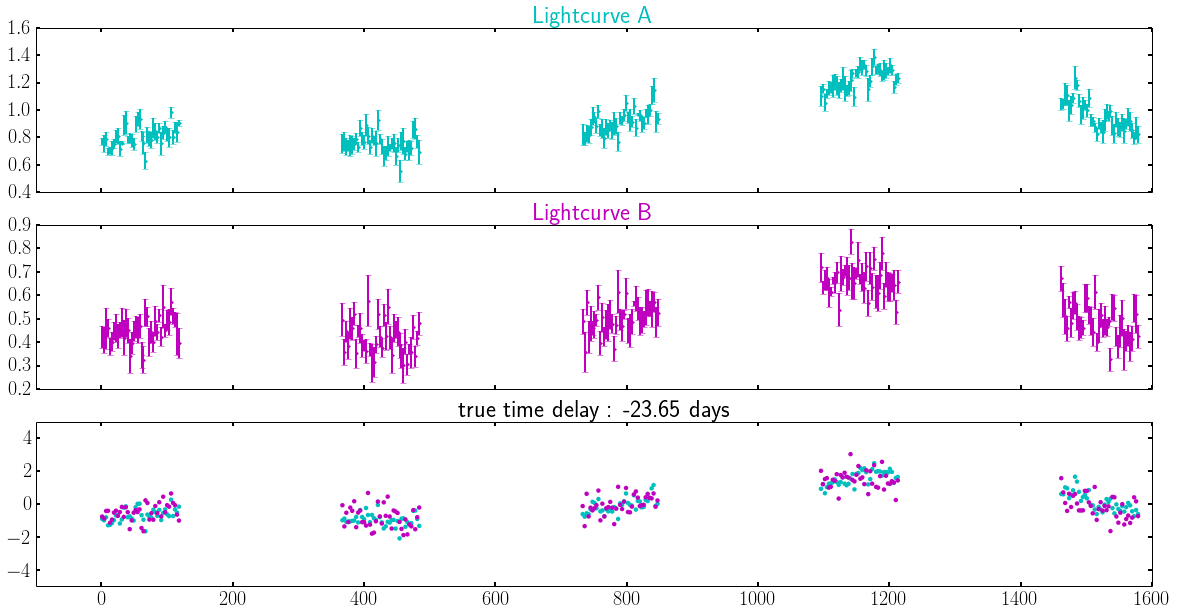

In [2]:
make_fig_1()

# Methodology

## Over all strategy

The original contestants of the Time Delay Challenge did not have access to any dataset with ground truth. As a consequence most of the teams used optimization and unsupervised learning methods (did they??). However one of the teams used a supervised learning approach after manually labeling their data. 

Our approach is losely based on theirs. However we have not had to resort to manually labeled data, as ground truth has been published for one of the datasets after the end of the challenge.

Basic steps:

* Split light curves into continuous observation windows
* Smooth the light curves and interpolate evenly sampled data
* Compare the two light curves of each window for each timesift
  * Find the best timeshift for each window
* Compare the estimated time delays of different windows of the same pair
* Use a clustering algorithm to cluster the results
* Apply a regression method to the clustered values

## Split light curves into continuous observation windows
FIXME: Describe how

## Smooth the light curves and interpolate evenly sampled data
We smoothed each observing window for each light curve individually using a Gaussian Process, using tau and sig from the ground truth. It is however also possible to optimize the smoothing by cross validation. We
not only solve the problem of the raw time series being unevently-sampled in time, but also keep
error estimate in this step.

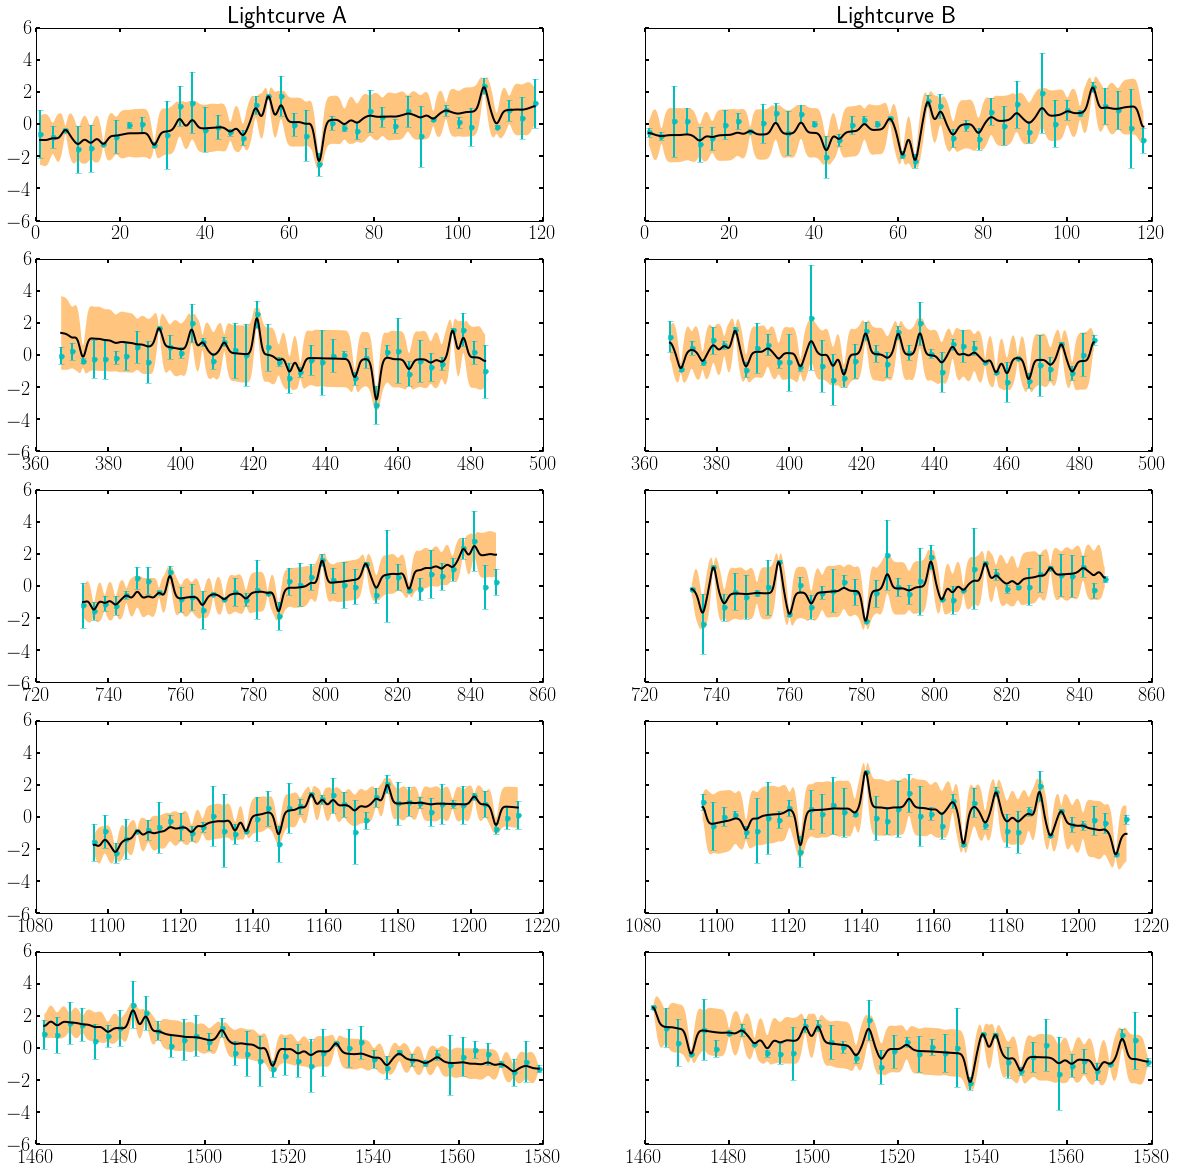

In [3]:
make_fig_2()

## Compare the two light curves of each window for each timesift
We compared the two light curves of each window for each possible timeshift of one curve relative to the other using three different methods:

### Correlation
We measured the cross correlation and selected the timeshift that resulted in the maximum correlation coefficient.

### Negative correlation
FIXME: Describe here

### Mean squared error
We measured the mean squared error and selected the timeshift that resulted in the smallest error.


[ 15585.  15586.  15587.  15588.  15589.]


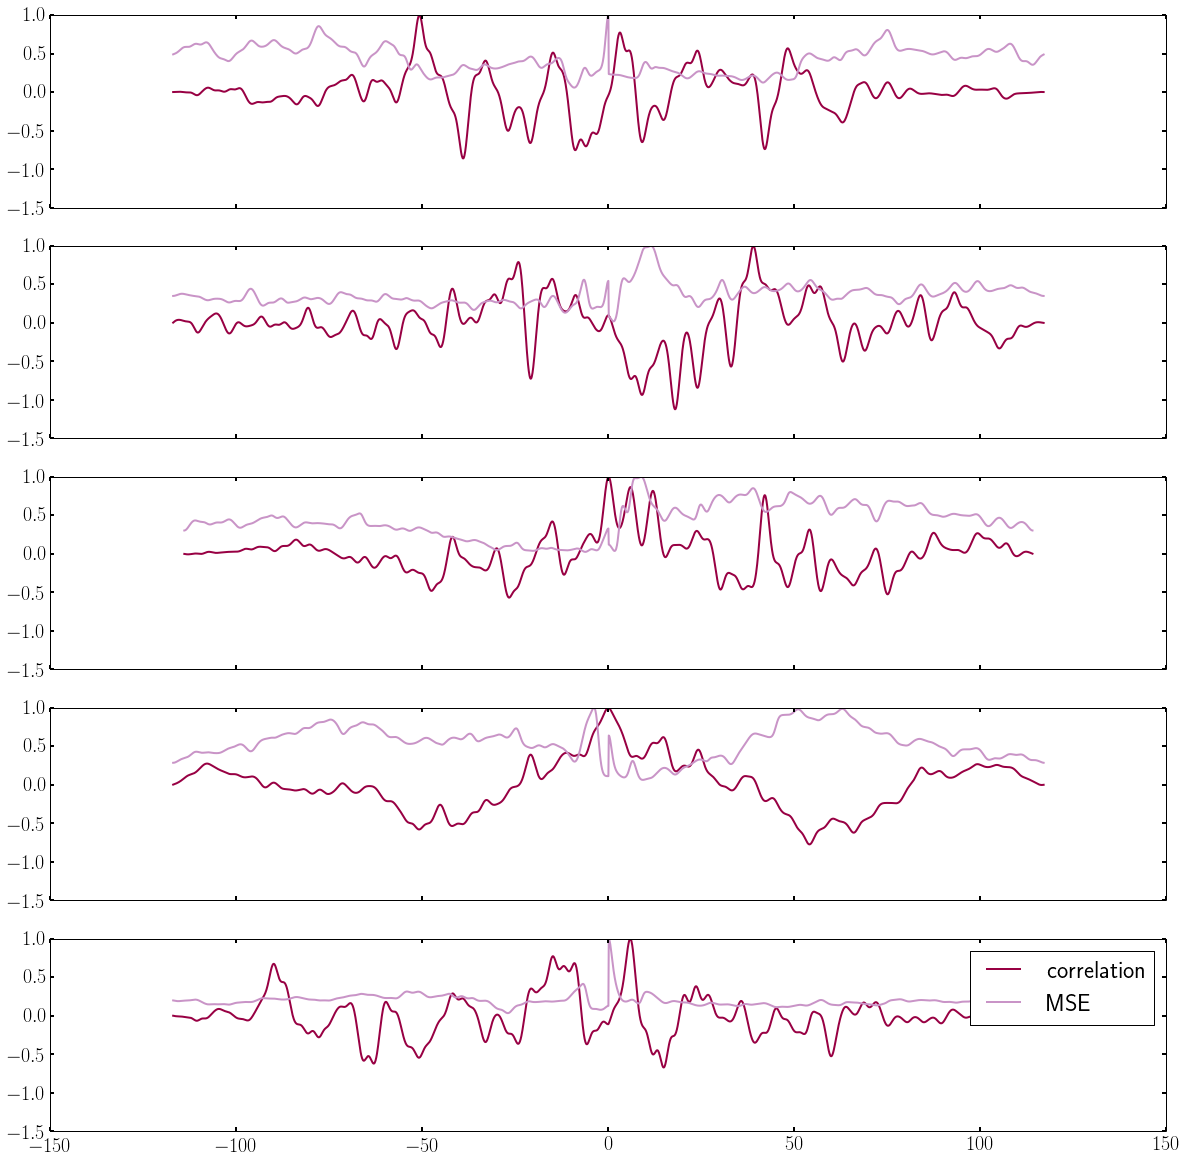

In [5]:
make_fig_3()

## Compare the estimated time delays of different windows of the same pair
The maximum correlation offsets for different windows can vary quite a lot for the same light curve pair. We found that the closer the real dt got to the sampling window length, the more the maximum correlations varied across windows. We assumed this was due to aliasing.

To capture this dynamic, we calculated both the mean and median as well as the standard deviation of the maximum correlation offsets within each pair, weighting the maximum correlation offset of each window by its correlation coefficient.

Additional problems with time delay estimation directly from the correlation coefficients:

* Each light curve has experienced microlensing events that are independent of those of the other image – solution: account for microlensing events in a statistical way rather than individually – the far-fetched proposed solution: train a classifier (maybe a neural network?) on the microlensing events and subtract a range of typical microlensing events from both signals, and use cross validation to choose the best microlensing effect by maximizing the cross correlation coefficients.

* We have no information about the effect of microlensing effects, they could only influence the trend of the data, so may be removed by detrending the light curves before cross correlating them, but the added peaks are impossible to be accounted for indicidually, but only in a statistical sense – solution: work with centred, normalized, and detrended light curves

## Use a clustering algorithm to cluster the results
The results from the previous step contains a lot of noise, and so fitting a linear regression directly to the data, even with polynomial terms, yields very bad results.

This can be significantly improved by using a clustering algorithm such as nearest neighbour on the correlation offset measures first, deriving an estimation of the mean, median and stddev of the window maximum correlations for each true dt.

## Apply a regression method to the clustered values
FIXME: Describe what regression methods we used


We used a regression algorithm with the maximum correlation coefficients and MSE of the two light curves as
as features for the entire pair, using the true dt, as well as other ground truth information we have
as the labels, hoping to do a multi-dimensional regression.

## Failed methods
During our experimentation we applied a few methods that did not yield any correlation, or a much too weak correlation to be useful. The following is a (possibly incomplete) list of those aproaches, and our hypothesis for why they failed:

### FFT

We tried to apply an FFT to the interpolated, evenly sampled data, hypothesising that the phase (angle of the complex FFT value) of the highest-amplitude frequency would correlate with the real dt.

Inside each window, the signal is highly a-periodic, which probably introduces a lot of noise.

### Lomb-Scargle periodograms

Lomb-Scargle periodograms are supposed to do what an FFT does, but for unevenly sampled data. Unfortunately it failed to even give amplitudes similar to those calculated by the FFT of the interpolated data.

### Mean squared error correlation

We assumed that different ways of correlating the two light curves would pick up on different features of the curves (??), and so might be usefull in combination as features. Only the stddev between the MSE of the windows turned out to have any, and only a very weak, correlation with the real dt, and there was no correlation with the sign of the real dt.